# **Regression Tree**

In this part, we will use scikit-learn's decision tree regressor and test its performance on the same dataset used in the previous part. We will be using different lookback sizes to form your data this time.

### Imports

In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

In [6]:
const = 7
def process_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    data = []
    for line in lines:    
        x_str, y_str = line.strip().split(',')
        x = int(x_str)
        y = int(y_str)
        data.append([x, y])   
    data = np.array(data)
    return data

def calculate_rmse(actual_data, predicted_data):

    rmse_temp = np.sqrt(np.mean((actual_data - predicted_data)**2))
    return  1/rmse_temp + const


In [7]:
Train_Data = process_data('training_data.txt')
Test_Data = process_data('test01.txt')

lookbacks = [1,2,3]

reg = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split=10, random_state=5)
predictions = []
rmses = []

for lookback in lookbacks:
    train_dataX = Train_Data[:-lookback]
    train_dataY = Train_Data[lookback:]
    test_dataX = Test_Data[:-lookback]
    test_dataY = Test_Data[lookback:]

    reg.fit(train_dataX,train_dataY)
    prediction = reg.predict(test_dataX)
    predictions.append(prediction)
    
    rmse = calculate_rmse(test_dataY, prediction)
    rmses.append(rmse)

### Evaluation and Analysis

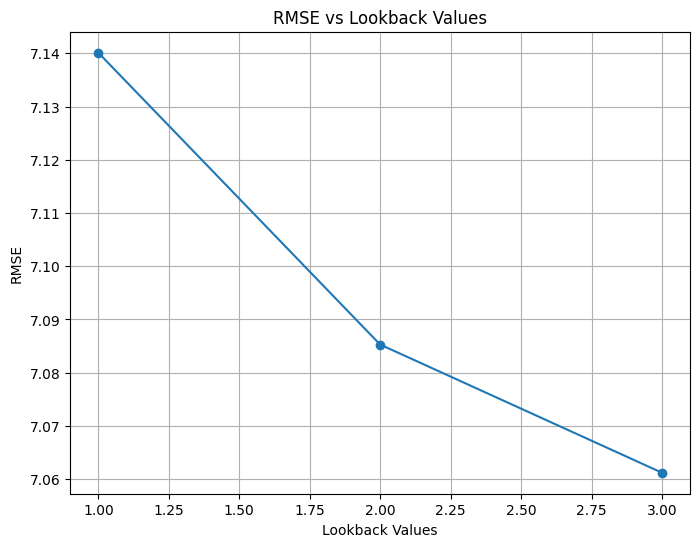

In [8]:
# code here
plt.figure(figsize=(8, 6))
plt.plot(lookbacks, rmses, marker='o')
plt.xlabel('Lookback Values')
plt.ylabel('RMSE')
plt.title('RMSE vs Lookback Values')
plt.grid(True)
plt.show()

"By examining the Root Mean Squared Error (RMSE) values, we observe a distinct decreasing trend as the lookback values increase. This suggests that higher lookback values result in more accurate path predictions, indicating a stronger relationship between the input features and the target variable. This is particularly notable in the context of our regression tree model, which leverages the lookback values to capture patterns and relationships in the data. As the lookback values increase, the model is able to incorporate more historical information, leading to improved predictive performance and a reduction in error. This finding supports the idea that incorporating more context and historical data can enhance the accuracy of path predictions in our specific problem domain."

### Visualization of Actual and Predicted Path

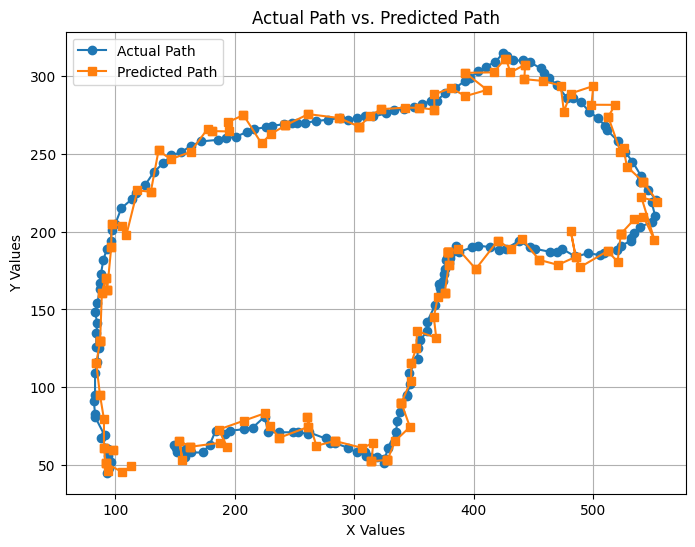

In [9]:
trainX_180 = Train_Data[:-3]
trainY_180 = Train_Data[3:]


seconds_6_interval_test = Test_Data[100:280]

testX_180 = seconds_6_interval_test[: -3]
testY_180 = seconds_6_interval_test[3 :]

reg = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split=10, random_state=5)
reg.fit(train_dataX,train_dataY)
prediction_180 = reg.predict(testX_180)

actual_x = [point[0] for point in testY_180]
actual_y = [point[1] for point in testY_180]

predicted_x = [point[0] for point in prediction_180]
predicted_y = [point[1] for point in prediction_180]

plt.figure(figsize=(8, 6))
plt.plot(actual_x, actual_y, marker='o', label='Actual Path')
plt.plot(predicted_x, predicted_y, marker='s', label='Predicted Path')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Actual Path vs. Predicted Path')
plt.legend()
plt.grid(True)
plt.show()
